In [ ]:
!nvidia-smi

Wed Mar 16 13:02:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 300 (delta 72), reused 43 (delta 21), pack-reused 171
Receiving objects: 100% (300/300), 86.52 KiB | 3.76 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Traceback (most recent call last):
  File "rapidsai-csp-utils/colab/env-check.py", line 24, in <module>
    Please use 'Runtime -> Factory Reset Runtimes...', which will allocate you a different GPU instance, to try again."""
Exception: 
                  Unfortunately Colab didn't give you a RAPIDS compatible GPU (P4, P100, T4, or V100), but gave you a Tesla K80.

                  Please use 'Runtime -> Factory Reset Runtimes...', which will allocate you a different GPU instance, to try again.


In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 h

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:42
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>' 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.14.5
Uninstalling cffi-1.14.5:
  Successfully uninstalled cffi-1.14.5
Found existing installation: cryptography 3.4.5
Uninstalling cryptography-3.4.5:
  Successfully uninstalled cryptography-3.4.5
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
done

## Package Plan ##

 

In [ ]:
import cuml as ml

/usr/local/lib/python3.7/site-packages/cudf/utils/gpu_utils.py:93: UserWarning: You will need a GPU with NVIDIA Pascal™ or newer architecture
Detected GPU 0: Tesla K80 
Detected Compute Capability: 3.7
  f"You will need a GPU with NVIDIA Pascal™ or "


In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
speakers=["Benjamin_Netanyau","Jens_Stoltenberg","Julia_Gillard","Magaret_Tarcher","Nelson_Mandela"]

In [ ]:
filename="/content/drive/MyDrive/1st Audio analysis/16000_pcm_speeches/Benjamin_Netanyau/1040.wav"

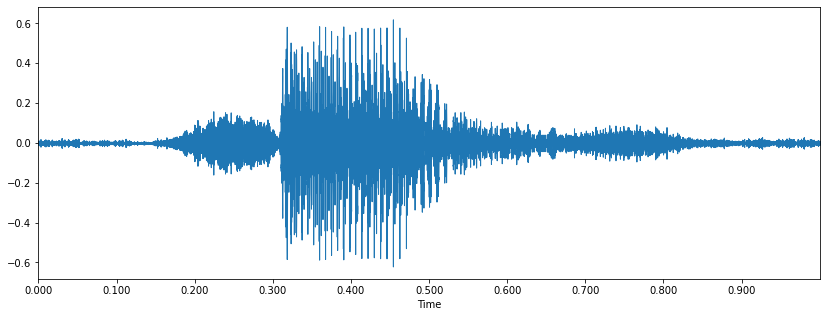

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
print(data)

[0.00222353 0.0074598  0.01077878 ... 0.00699579 0.01042312 0.00732225]


In [ ]:
data.shape

(22050,)

In [ ]:
searcher=pd.DataFrame(columns=["speaker","audio_file"])

In [ ]:
fn="/content/drive/MyDrive/1st Audio analysis/16000_pcm_speeches"

In [ ]:
lis=[]
k=0
for i in speakers:
  lis=os.listdir(fn+"/"+i)
  for j in lis:
    searcher.loc[k]=[i,j]
    k+=1
searcher.head()
    

,speaker,audio_file
0,Benjamin_Netanyau,1442.wav
1,Benjamin_Netanyau,1468.wav
2,Benjamin_Netanyau,20.wav
3,Benjamin_Netanyau,171.wav
4,Benjamin_Netanyau,143.wav


In [ ]:
searcher.tail()

,speaker,audio_file
7496,Nelson_Mandela,163.wav
7497,Nelson_Mandela,1153.wav
7498,Nelson_Mandela,1088.wav
7499,Nelson_Mandela,1335.wav
7500,Nelson_Mandela,1033.wav


In [ ]:
searcher["speaker"].unique()

array(['Benjamin_Netanyau', 'Jens_Stoltenberg', 'Julia_Gillard',
       'Magaret_Tarcher', 'Nelson_Mandela'], dtype=object)

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 44)


In [ ]:
final_data=pd.DataFrame(columns=["Feature"])

In [ ]:
k=0
X=[]
for i in range(len(searcher)):
  data,sample_rate=librosa.load(fn+"/"+searcher["speaker"][i]+"/"+searcher["audio_file"][i])
  mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs.T,axis=0)
  X.append(mfccs_scaled_features)

In [ ]:
X

[array([-131.59184   ,  120.39333   ,  -58.046787  ,   71.14033   ,
          -3.3128037 ,   25.182625  ,  -21.898743  ,    9.229514  ,
         -15.423972  ,  -18.497051  ,   -4.5579486 ,  -28.851778  ,
          -8.588393  ,  -19.99096   ,  -11.49496   ,   -7.232832  ,
          -1.3277887 ,  -14.752796  ,   -6.3738256 ,   -1.7798351 ,
          -7.8754916 ,    0.32861692,   -3.841564  ,   -3.9133005 ,
          -6.7653155 ,   -0.6999098 ,   -5.6581616 ,   -0.6067396 ,
          -1.8565121 ,   -5.11269   ,   -2.1427484 ,   -1.0410329 ,
          -2.6898153 ,   -6.68186   ,   -2.5690286 ,   -9.20317   ,
          -3.9947226 ,   -5.525733  ,   -6.419234  ,   -3.2898142 ],
       dtype=float32),
 array([ -42.90088   ,  126.00366   , -150.77052   ,   47.114456  ,
         -47.017323  ,   37.381454  ,  -48.285458  ,   19.745735  ,
         -17.216007  ,   -5.279099  ,   -6.0077925 ,  -18.340273  ,
           2.0509217 ,  -23.77953   ,    4.295862  ,  -22.453884  ,
           4.0714893 ,  

In [ ]:
extracted_features_df=pd.DataFrame(X,columns=[i for i in range(40)])
extracted_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-131.591843,120.393333,-58.046787,71.140327,-3.312804,25.182625,-21.898743,9.229514,-15.423972,-18.497051,...,-2.142748,-1.041033,-2.689815,-6.681860,-2.569029,-9.203170,-3.994723,-5.525733,-6.419234,-3.289814
1,-42.900879,126.003662,-150.770523,47.114456,-47.017323,37.381454,-48.285458,19.745735,-17.216007,-5.279099,...,-1.380132,-5.954688,1.078798,-6.481160,3.782115,-5.377533,4.328127,-3.121651,1.037634,-1.571308
2,-369.800964,128.223663,-52.410778,77.079514,-22.155649,42.159740,-22.367231,18.840294,-5.398313,-3.105265,...,-3.297553,-6.998960,-0.449600,-9.433591,-1.981388,-8.879870,-1.207957,-5.622942,-2.835345,-2.105475
3,-46.800819,124.877045,-150.500488,44.676571,-48.447670,41.488087,-49.192482,21.195116,-13.986981,-5.560578,...,-1.801384,-6.093105,0.878612,-6.786363,2.589314,-8.004170,1.206974,-5.148137,-0.234773,-1.949115
4,-49.298161,125.893288,-148.501083,43.973145,-45.312889,39.609066,-49.144253,15.728066,-17.245613,-6.715042,...,-0.818027,-2.730053,3.235684,-5.032190,3.957674,-5.773765,2.663606,-4.084725,0.972915,-1.307295


In [ ]:
extracted_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7501 non-null   float32
 1   1       7501 non-null   float32
 2   2       7501 non-null   float32
 3   3       7501 non-null   float32
 4   4       7501 non-null   float32
 5   5       7501 non-null   float32
 6   6       7501 non-null   float32
 7   7       7501 non-null   float32
 8   8       7501 non-null   float32
 9   9       7501 non-null   float32
 10  10      7501 non-null   float32
 11  11      7501 non-null   float32
 12  12      7501 non-null   float32
 13  13      7501 non-null   float32
 14  14      7501 non-null   float32
 15  15      7501 non-null   float32
 16  16      7501 non-null   float32
 17  17      7501 non-null   float32
 18  18      7501 non-null   float32
 19  19      7501 non-null   float32
 20  20      7501 non-null   float32
 21  21      7501 non-null   float32
 22  

In [ ]:
extracted_features_df["speaker"]=searcher["speaker"]
extracted_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,speaker
0,-131.591843,120.393333,-58.046787,71.140327,-3.312804,25.182625,-21.898743,9.229514,-15.423972,-18.497051,...,-1.041033,-2.689815,-6.681860,-2.569029,-9.203170,-3.994723,-5.525733,-6.419234,-3.289814,Benjamin_Netanyau
1,-42.900879,126.003662,-150.770523,47.114456,-47.017323,37.381454,-48.285458,19.745735,-17.216007,-5.279099,...,-5.954688,1.078798,-6.481160,3.782115,-5.377533,4.328127,-3.121651,1.037634,-1.571308,Benjamin_Netanyau
2,-369.800964,128.223663,-52.410778,77.079514,-22.155649,42.159740,-22.367231,18.840294,-5.398313,-3.105265,...,-6.998960,-0.449600,-9.433591,-1.981388,-8.879870,-1.207957,-5.622942,-2.835345,-2.105475,Benjamin_Netanyau
3,-46.800819,124.877045,-150.500488,44.676571,-48.447670,41.488087,-49.192482,21.195116,-13.986981,-5.560578,...,-6.093105,0.878612,-6.786363,2.589314,-8.004170,1.206974,-5.148137,-0.234773,-1.949115,Benjamin_Netanyau
4,-49.298161,125.893288,-148.501083,43.973145,-45.312889,39.609066,-49.144253,15.728066,-17.245613,-6.715042,...,-2.730053,3.235684,-5.032190,3.957674,-5.773765,2.663606,-4.084725,0.972915,-1.307295,Benjamin_Netanyau


In [ ]:
extracted_features_df.shape

(7501, 41)

In [ ]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(extracted_features_df["speaker"]))
Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(extracted_features_df.iloc[:,:-1],Y,test_size=0.2,random_state=10)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(6000, 40) (1501, 40) (6000, 5) (1501, 5)


In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.4))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.4))

###final layer
model.add(Dense(5))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test), callbacks=[checkpointer], verbose=1)


Epoch 1/100
186/188 [============================>.] - ETA: 0s - loss: 4.7903 - accuracy: 0.4387
Epoch 1: val_loss improved from inf to 0.74426, saving model to saved_models/audio_classification.hdf5
188/188 [==============================] - 4s 6ms/step - loss: 4.7585 - accuracy: 0.4408 - val_loss: 0.7443 - val_accuracy: 0.6889
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.8777 - accuracy: 0.6748
Epoch 2: val_loss improved from 0.74426 to 0.40463, saving model to saved_models/audio_classification.hdf5
188/188 [==============================] - 1s 5ms/step - loss: 0.8777 - accuracy: 0.6748 - val_loss: 0.4046 - val_accuracy: 0.9021
Epoch 3/100
186/188 [============================>.] - ETA: 0s - loss: 0.5201 - accuracy: 0.8108
Epoch 3: val_loss improved from 0.40463 to 0.21309, saving model to saved_models/audio_classification.hdf5
188/188 [==============================] - 1s 5ms/step - loss: 0.5191 - accuracy: 0.8112 - val_loss: 0.2131 - val_accuracy: 0.9554